In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:98% !important; }</style>")

In [2]:
%load_ext autoreload
%autoreload 2

In [68]:
import matplotlib.pyplot as plt
# from shapely.geometry import Point, Polygon, shape
import asf_search as asf
# from datetime import datetime, date, timedelta, timezone
# from typing import List
from pystac_client import Client, ItemSearch
# import geopandas as gpd
# from rasterio.crs import CRS
# import contextily as cx
# import pandas as pd
# from shapely.ops import unary_union
# from itertools import combinations
from opera_coverage import *
from shapely.geometry import Polygon
from datetime import datetime

### Polygons of areas of interest:

Ridgecrest coordinates: Polygon([[-117.7167, 35.5909],[-117.6322, 35.5909],[-117.6322, 35.6452],[-117.7167, 35.6452],[-117.7167, 35.5909]])

Wax lake delta: Polygon([[-91.4964, 29.4641],[-91.3849, 29.4641],[-91.3849, 29.5627],[-91.4964, 29.5627],[-91.4964, 29.4641]])

Laurentides forest in Canada: Polygon([[-75.0327, 46.0832],[-74.8823, 46.0832],[-74.8823, 46.1914],[-75.0327, 46.1914],[-75.0327, 46.0832]])

In [6]:
# create shapely and geodataframe files of areas of interest
ridgecrest = Polygon([[-117.7167, 35.5909],[-117.6322, 35.5909],[-117.6322, 35.6452],[-117.7167, 35.6452],[-117.7167, 35.5909]])
waxlake = Polygon([[-91.4964, 29.4641],[-91.3849, 29.4641],[-91.3849, 29.5627],[-91.4964, 29.5627],[-91.4964, 29.4641]])
laurentides = Polygon([[-75.0327, 46.0832],[-74.8823, 46.0832],[-74.8823, 46.1914],[-75.0327, 46.1914],[-75.0327, 46.0832]])
ridgecrest_df = shape2gdf(ridgecrest, 'ridgecrest')
waxlake_df = shape2gdf(waxlake, 'waxlake')
laurentides_df = shape2gdf(laurentides, 'laurentides')

In [86]:
laurentides.wkt

'POLYGON ((-75.0327 46.0832, -74.8823 46.0832, -74.8823 46.1914, -75.0327 46.1914, -75.0327 46.0832))'

In [10]:
%%time
freq1, next_acq1, area1 = get_coverage(['sentinel1','sentinel2','landsat8'],ridgecrest,[datetime(2022,1,1), datetime(2022,2,1)])


CPU times: user 180 ms, sys: 15.7 ms, total: 195 ms
Wall time: 5.06 s


In [11]:
freq2, next_acq2, area2 = get_coverage(['sentinel1','sentinel2','landsat8'],waxlake,[datetime(2022,1,1), datetime(2022,2,1)])


In [30]:
freq3, next_acq3, area3 = get_coverage(['sentinel1','sentinel2','landsat8'],laurentides,[datetime(2022,1,1), datetime(2022,2,1)])


here
here
here


In [31]:
print(freq3['landsat8'])
print(next_acq3['landsat8'])
print(freq3['sentinel1'])
print(next_acq3['sentinel1'])
print(freq3['sentinel2'])
print(next_acq3['sentinel2'])

['7 days, 0:06:09.592000', '8 days, 23:53:45.752000', '7 days, 0:06:09.381000']
Time of next acquisition after 2022-02-01 00:00:00 is 2022-02-09 15:44:10.497000+00:00
['11 days, 23:59:59']
Time of next acquisition after 2022-02-01 00:00:00 is 2022-02-03 22:52:35+00:00
['4 days, 23:59:54.343000', '1 day, 23:50:08.985000', '3 days, 0:09:55.962000', '1 day, 23:49:58.458000', '3 days, 0:09:55.955000', '1 day, 23:50:08.248000', '3 days, 0:09:56.423000', '1 day, 23:49:57.882000', '3 days, 0:09:55.919000', '1 day, 23:50:09.988000']
Time of next acquisition after 2022-02-01 00:00:00 is 2022-02-04 16:00:15.136000+00:00


In [32]:
freq3['landsat8']

['7 days, 0:06:09.592000', '8 days, 23:53:45.752000', '7 days, 0:06:09.381000']

### Work in progress

In [36]:
a = land8_forest.append(sent2_forest)
a.drop(['start_date'],axis=1,inplace=True)
a.sort_values(by=['startTime']).reset_index(drop=True)

/var/folders/hs/wfv_gwl12y740vc3gk80q82h0000gq/T/ipykernel_13265/2537816390.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = land8_forest.append(sent2_forest)


,startTime,geometry,sensor
0,2022-01-03 16:10:18.694000+00:00,"POLYGON ((-76.28945 45.95828, -76.31456 46.946...",sentinel2
1,2022-01-08 15:44:18.159000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",landsat8
2,2022-01-08 16:10:13.037000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2
3,2022-01-10 16:00:22.022000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2
4,2022-01-13 16:10:17.984000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2
5,2022-01-15 15:50:27.751000+00:00,"POLYGON ((-74.87403 45.96548, -76.29100 45.958...",landsat8
6,2022-01-15 16:00:16.442000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2
7,2022-01-18 16:10:12.397000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2
8,2022-01-20 16:00:20.645000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2
9,2022-01-23 16:10:17.068000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2


In [85]:
sent1_forest.fileID.tolist()

['S1A_IW_SLC__1SDV_20220110T225236_20220110T225303_041405_04EC56_1726-SLC',
 'S1A_IW_SLC__1SDV_20220122T225235_20220122T225302_041580_04F215_5E73-SLC']

In [62]:
b = a.append(sent1_forest).reset_index(drop=True)
b.sort_values(by=['startTime'],inplace=True)
b.reset_index(drop=True)

/var/folders/hs/wfv_gwl12y740vc3gk80q82h0000gq/T/ipykernel_13265/3120420114.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = a.append(sent1_forest).reset_index(drop=True)


,startTime,geometry,sensor
0,2022-01-03 16:10:18.694000+00:00,"POLYGON ((-76.28945 45.95828, -76.31456 46.946...",sentinel2
1,2022-01-08 15:44:18.159000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",landsat8
2,2022-01-08 16:10:13.037000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2
3,2022-01-10 16:00:22.022000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2
4,2022-01-10 22:52:36+00:00,"POLYGON ((-76.75502 46.30980, -76.29864 44.693...",sentinel1
5,2022-01-13 16:10:17.984000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2
6,2022-01-15 15:50:27.751000+00:00,"POLYGON ((-74.87403 45.96548, -76.29100 45.958...",landsat8
7,2022-01-15 16:00:16.442000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2
8,2022-01-18 16:10:12.397000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2
9,2022-01-20 16:00:20.645000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2


In [61]:
b.sensor.tolist()

['sentinel2',
 'landsat8',
 'sentinel2',
 'sentinel2',
 'sentinel1',
 'sentinel2',
 'landsat8',
 'sentinel2',
 'sentinel2',
 'sentinel2',
 'sentinel1',
 'sentinel2',
 'landsat8',
 'sentinel2',
 'sentinel2',
 'sentinel2',
 'landsat8']

In [74]:
np.diff(b.startTime).shape

(16,)

In [75]:
b.startTime.shape

(17,)

In [78]:
b['cadence'] = b.startTime.diff()
# b.loc[1:, 'cadence'] = b.startTime.diff()


In [79]:
b

,startTime,geometry,sensor,cadence
4,2022-01-03 16:10:18.694000+00:00,"POLYGON ((-76.28945 45.95828, -76.31456 46.946...",sentinel2,NaT
0,2022-01-08 15:44:18.159000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",landsat8,4 days 23:33:59.465000
5,2022-01-08 16:10:13.037000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2,0 days 00:25:54.878000
6,2022-01-10 16:00:22.022000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2,1 days 23:50:08.985000
15,2022-01-10 22:52:36+00:00,"POLYGON ((-76.75502 46.30980, -76.29864 44.693...",sentinel1,0 days 06:52:13.978000
7,2022-01-13 16:10:17.984000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2,2 days 17:17:41.984000
1,2022-01-15 15:50:27.751000+00:00,"POLYGON ((-74.87403 45.96548, -76.29100 45.958...",landsat8,1 days 23:40:09.767000
8,2022-01-15 16:00:16.442000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2,0 days 00:09:48.691000
9,2022-01-18 16:10:12.397000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2,3 days 00:09:55.955000
10,2022-01-20 16:00:20.645000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2,1 days 23:50:08.248000


In [80]:
b.cadence.mean()

Timedelta('1 days 17:58:45.261875')

<AxesSubplot:>

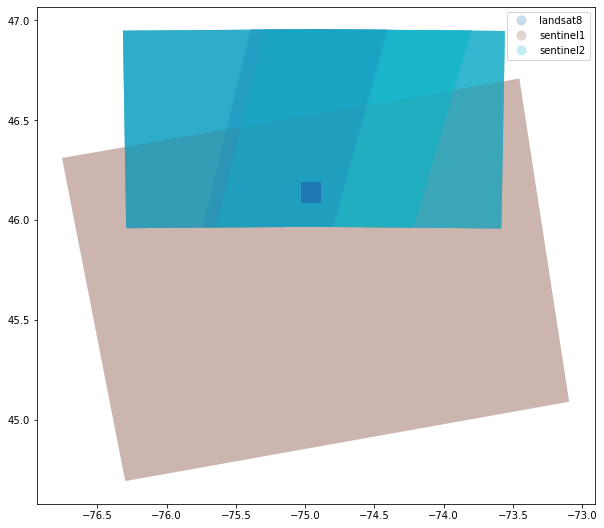

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
b.plot(column='sensor',alpha=0.25, legend=True, ax=ax)
laurentides_df.plot(ax=ax)

In [72]:
import numpy as np
np.diff(b.startTime)

array([Timedelta('4 days 23:33:59.465000'),
       Timedelta('0 days 00:25:54.878000'),
       Timedelta('1 days 23:50:08.985000'),
       Timedelta('0 days 06:52:13.978000'),
       Timedelta('2 days 17:17:41.984000'),
       Timedelta('1 days 23:40:09.767000'),
       Timedelta('0 days 00:09:48.691000'),
       Timedelta('3 days 00:09:55.955000'),
       Timedelta('1 days 23:50:08.248000'),
       Timedelta('2 days 06:52:14.355000'),
       Timedelta('0 days 17:17:42.068000'),
       Timedelta('0 days 23:33:56.435000'),
       Timedelta('1 days 00:16:01.447000'),
       Timedelta('3 days 00:09:55.919000'),
       Timedelta('1 days 23:50:09.988000'),
       Timedelta('0 days 23:50:02.027000')], dtype=object)

In [ ]:
world = gpd.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(10,10))

### The below cells are just for reminding what format the output results have

In [20]:
wkt = laurentides.wkt
opts = {
    'platform': asf.PLATFORM.SENTINEL1,
    'processingLevel': [asf.PRODUCT_TYPE.SLC],
    'beamMode': [asf.BEAMMODE.IW],
    'start': '2022-01-01T00:00:00Z',
    'end': '2022-02-01T23:59:59Z'
}
results = asf.search(intersectsWith=wkt,**opts)
print(len(results))

2


In [82]:
sent1_forest = format_results_for_sent1(results)

In [22]:
STAC_URL = 'https://cmr.earthdata.nasa.gov/stac'
api = Client.open(f'{STAC_URL}/LPCLOUD/')
hls_collections = ['HLSS30.v2.0']
search_params = {"collections": hls_collections,
                 "bbox": [-75.0327, 46.0832, -74.8823, 46.1914], # list of xmin, ymin, xmax, ymax
                 "datetime": [datetime(2022,1,1), datetime(2022,2,1)],
                 }
search_hls = api.search(**search_params)
hls_collection = search_hls.get_all_items()
g = list(hls_collection)
# d[0].properties

In [90]:
d[0].id

'HLS.L30.T18TVS.2022008T154418.v2.0'

In [91]:
dir(d[0])

['STAC_OBJECT_TYPE',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_object_links',
 '_repr_html_',
 'add_asset',
 'add_link',
 'add_links',
 'assets',
 'bbox',
 'clear_links',
 'clone',
 'collection_id',
 'common_metadata',
 'datetime',
 'extra_fields',
 'from_dict',
 'from_file',
 'full_copy',
 'geometry',
 'get_assets',
 'get_collection',
 'get_datetime',
 'get_links',
 'get_parent',
 'get_root',
 'get_root_link',
 'get_self_href',
 'get_single_link',
 'get_stac_objects',
 'id',
 'links',
 'make_asset_hrefs_absolute',
 'make_asset_hrefs_relative',
 'matches_object_type',
 'properties',
 'remov

In [92]:
d[0].to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0',
 'id': 'HLS.L30.T18TVS.2022008T154418.v2.0',
 'properties': {'datetime': '2022-01-08T15:44:18.159000Z',
  'start_datetime': '2022-01-08T15:44:18.159Z',
  'end_datetime': '2022-01-08T15:44:42.038Z'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.7401564, 45.9631543],
    [-74.8740327, 45.9654817],
    [-74.871733, 46.9536373],
    [-75.3921562, 46.9530376],
    [-75.7401564, 45.9631543]]]},
 'links': [{'rel': 'self',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v2.0/items/HLS.L30.T18TVS.2022008T154418.v2.0'},
  {'rel': 'parent',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v2.0'},
  {'rel': 'collection',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v2.0'},
  {'rel': <RelType.ROOT: 'root'>,
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/',
   'type': <MediaType.JSON: 'application/json'>,
   'title': 'LPCLOUD'},
  {'rel': 'provider', '

In [35]:
sent2_forest = format_results_for_hls(g,'sentinel2')
sent2_forest = sent2_forest.dissolve(by='start_date').reset_index()
sent2_forest.drop(['start_date'], axis=1, inplace=True)

In [24]:
STAC_URL = 'https://cmr.earthdata.nasa.gov/stac'
api = Client.open(f'{STAC_URL}/LPCLOUD/')
hls_collections = ['HLSL30.v2.0']
search_params = {"collections": hls_collections,
                 "bbox": [-75.0327, 46.0832, -74.8823, 46.1914], # list of xmin, ymin, xmax, ymax
                 "datetime": [datetime(2022,1,1), datetime(2022,2,1)],
                 }
search_hls = api.search(**search_params)
hls_collection = search_hls.get_all_items()
d = list(hls_collection)

In [25]:
land8_forest = format_results_for_hls(d,'landsat8')

In [26]:
land8_forest = land8_forest.dissolve(by='startTime').reset_index()

In [ ]:
sent2_forest = sent2_forest.dissolve('start_date').reset_index()

In [ ]:
d[1].to_dict()

In [ ]:
shape(area1['sentinel1'])

# Visualization

In [ ]:
visual(df_dis.geometry)

In [ ]:
find_overlap(df_dis.geometry)

In [ ]:
visual(area1['sentinel1'],outline=True)

In [ ]:
visual(area1['sentinel1'])

In [ ]:
visual(area1)

In [ ]:
visual(area2)

In [ ]:
visual(area3)

### Deprecated